No Attack DataFrame columns: Index(['ratio'], dtype='object')
Attack DataFrame columns: Index(['ratio'], dtype='object')
AUC: 0.9999678986289656
Optimal Threshold: 87.6
False Positive Rate: 0.11179429849077697%
True Positive Rate: 99.58067456700091%


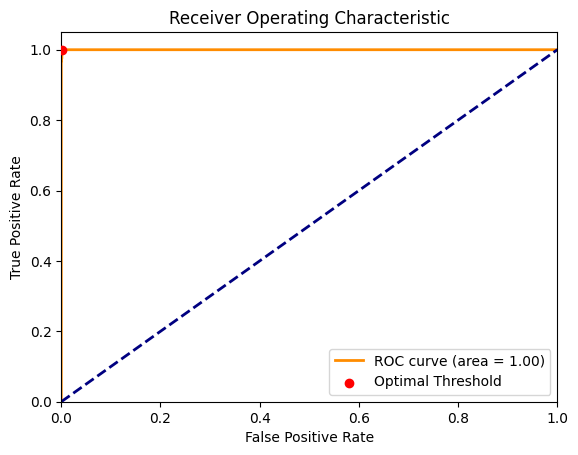

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the CSV files
no_attack_df = pd.read_csv('no_attack.csv', delimiter=',')
attack_df = pd.read_csv('attack.csv', delimiter=',')

# Check the columns of each DataFrame to ensure 'ratio' column is present
print("No Attack DataFrame columns:", no_attack_df.columns)
print("Attack DataFrame columns:", attack_df.columns)

# Ensure 'ratio' column is present in both DataFrames
if 'ratio' not in no_attack_df.columns:
    raise KeyError("The 'ratio' column is not found in no_attack_df")
if 'ratio' not in attack_df.columns:
    raise KeyError("The 'ratio' column is not found in attack_df")

# Convert 'ratio' column to numeric to ensure consistent data type
no_attack_df['ratio'] = pd.to_numeric(no_attack_df['ratio'], errors='coerce')
attack_df['ratio'] = pd.to_numeric(attack_df['ratio'], errors='coerce')

# Drop rows with NaN values in 'ratio' column, if any
no_attack_df.dropna(subset=['ratio'], inplace=True)
attack_df.dropna(subset=['ratio'], inplace=True)

# Label the data
no_attack_df['label'] = 0
attack_df['label'] = 1

# Combine the data
combined_df = pd.concat([no_attack_df[['ratio', 'label']], attack_df[['ratio', 'label']]], ignore_index=True)

# Extract the ratios and labels
data = combined_df['ratio'].values
labels = combined_df['label'].values

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(labels, data)
roc_auc = roc_auc_score(labels, data)

print(f"AUC: {roc_auc}")

# Calculate the distance to the top-left corner (0,1)
distances = np.sqrt((fpr - 0)**2 + (tpr - 1)**2)
optimal_index = np.argmin(distances)
optimal_threshold = thresholds[optimal_index]

print(f"Optimal Threshold: {optimal_threshold}")

# Function to check if data point exceeds the optimal threshold
def is_attack(ratio):
    return ratio > optimal_threshold

# Apply the is_attack function to no-attack and attack data
false_positives = [is_attack(ratio) for ratio in no_attack_df['ratio']]
true_positives = [is_attack(ratio) for ratio in attack_df['ratio']]

# Calculate false positive rate and true positive rate
false_positive_rate = sum(false_positives) / len(false_positives)
true_positive_rate = sum(true_positives) / len(true_positives)

print(f"False Positive Rate: {false_positive_rate * 100}%")
print(f"True Positive Rate: {true_positive_rate * 100}%")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[optimal_index], tpr[optimal_index], color='red', label='Optimal Threshold', zorder=10)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
